In [ ]:
# ..... visualizing clustering stability with clustree .... #

In [4]:
library(Seurat)
library(dplyr)
library(ggplot2)
library(clustree)

In [5]:
# list of stages and samples
stages = rep(c('stage14', 'stage17', 'stage21'), each = 3)
samples = paste0('sample', c('4', '7', '8A', '3_Triangle', '5B', '5Y', '1A', '1B', '2'))

In [20]:
# load data
id = 9
sc1 = readRDS(paste0(stages[id], '_', samples[id], '_data.rds'))
sc1$dataset = paste0('s', sub('\\.*sample', '', samples[id]))
sc1

An object of class Seurat 
26985 features across 8964 samples within 1 assay 
Active assay: RNA (26985 features, 2000 variable features)
 2 dimensional reductions calculated: pca, umap

In [21]:
ress = c(0.01, 0.02, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4, 0.6, 0.8, 1, 1.2)
sc1 <- FindNeighbors(sc1, dims = 1:10)
sc1 <- FindClusters(sc1, resolution = ress, verbose = F)

Computing nearest neighbor graph

Computing SNN



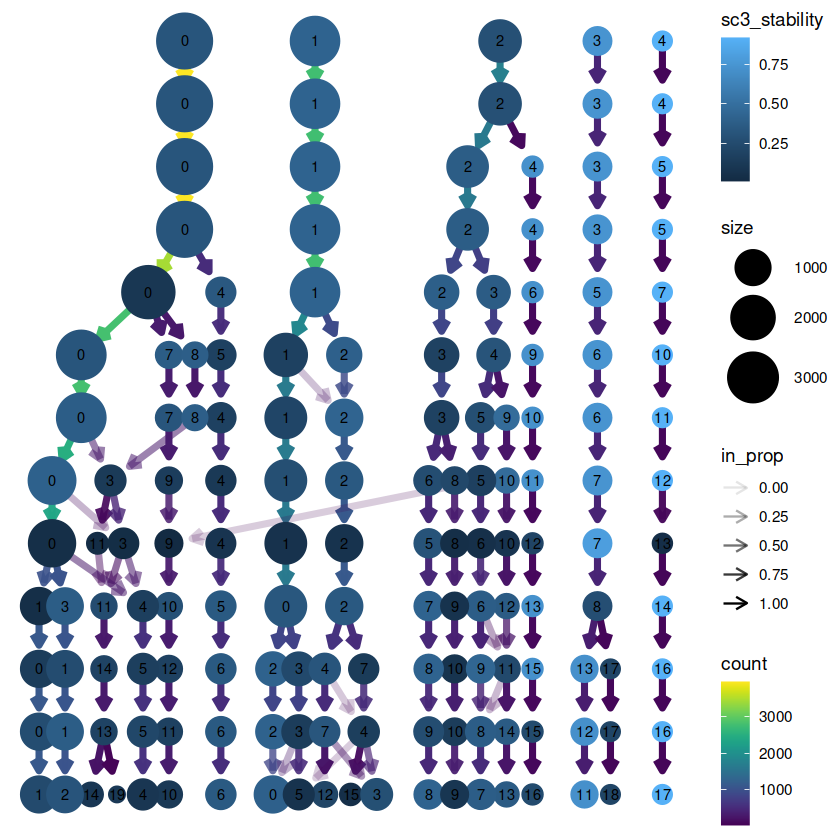

In [22]:
# clustree(sc1, prefix = "RNA_snn_res.")
# clustree(sc1, prefix = "RNA_snn_res.", layout = "sugiyama")
clustree(sc1, prefix = "RNA_snn_res.", node_colour = "sc3_stability")

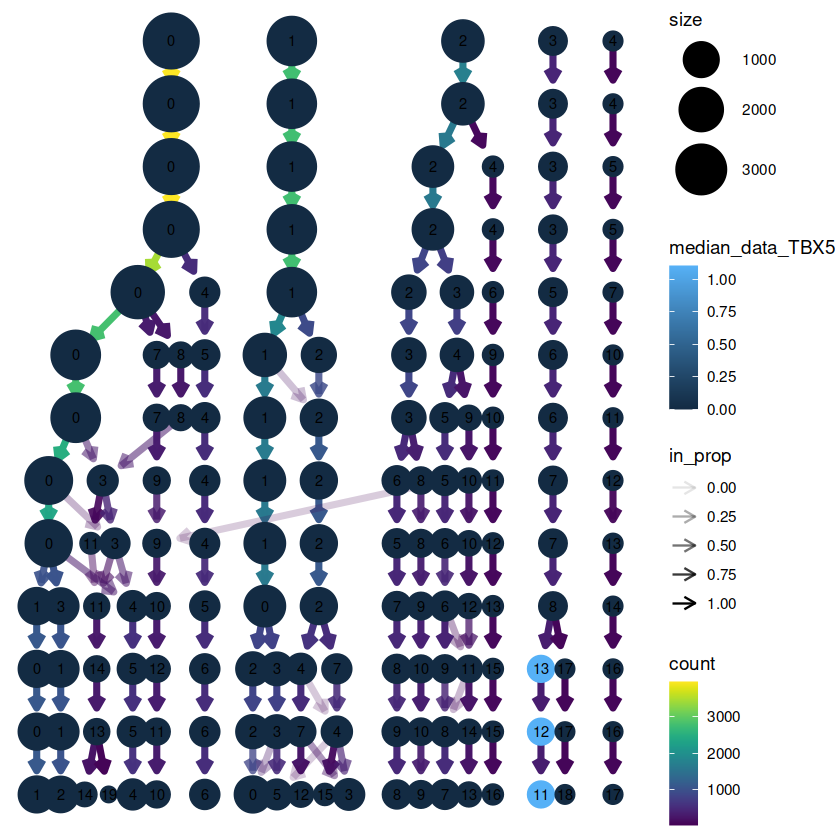

In [23]:
clustree(sc1, prefix = "RNA_snn_res.", node_colour = "TBX5", node_colour_aggr = "median")

In [ ]:
# ..... using Grabski et al method for significant hierarchical clustering ..... #

In [ ]:
# load data
id = 1
sc1 = readRDS(paste0(stages[id], '_', samples[id], '_data.rds'))
sc1$dataset = paste0('s', sub('\\.*sample', '', samples[id]))
sc1

In [8]:
mat1 = GetAssayData(sc1, 'counts')
mat1[1:2,1:2]

start.time <- Sys.time()

clusters <- scSHC(mat1, alpha = 0.25, parallel = FALSE)

end.time <- Sys.time()
time.taken <- round(end.time - start.time,2)
print(time.taken)

2 x 2 sparse Matrix of class "dgCMatrix"
             stage14_sample4_AAACCCACAATGAACA-1
OTX2                                          .
LOC101934893                                  .
             stage14_sample4_AAACCCACACGACAAG-1
OTX2                                          .
LOC101934893                                  .

In [16]:
pb = txtProgressBar(min = 0, max = length(stages), initial = 0)
for(id in 2:length(stages)){
    
    # load data
    sc1 = readRDS(paste0(stages[id], '_', samples[id], '_data.rds'))
    sc1$dataset = paste0('s', sub('\\.*sample', '', samples[id]))

    mat1 = GetAssayData(sc1, 'counts')

    start.time <- Sys.time()

    clusters <- scSHC(mat1, alpha = 0.25, parallel = FALSE)

    end.time <- Sys.time()
    time.taken <- round(end.time - start.time,2)
    print(time.taken)

    # save
    save(clusters, file = paste0(stages[id], '_', samples[id], '_clusters_SHC.Rdata'))
    setTxtProgressBar(pb, id)
}

Time difference of 17.05 mins
==================Time difference of 20.47 mins
=========Time difference of 15.97 mins
=========Time difference of 15.18 mins
========Time difference of 15.64 mins
=========Time difference of 9 mins
=========Time difference of 6.44 mins
=========Time difference of 11.52 mins

In [19]:
table(clusters[[1]])


   1    2    3    4    5    6    7    8    9 
 482 1270  468  553 4726  406  400  293  366 